# Tennis Ace

I will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analysing and modeling data from the Association of Tennis Professionals (ATP), I will determine what it takes to be one of the best tennis players in the world.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# load and investigate the data here:

df = pd.read_csv("tennis_stats.csv")
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [12]:
print(df.columns)
print(df.dtypes)
print(df.describe())

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')
Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                

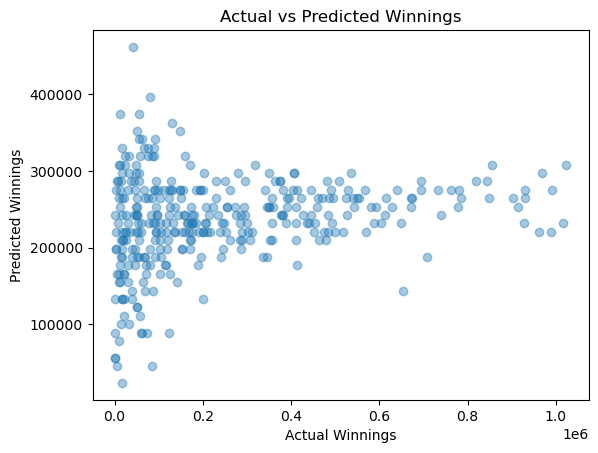

In [38]:
features = df[['FirstServeReturnPointsWon']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

model = LinearRegression()
model.fit(features_train,outcome_train)

model.score(features_test,outcome_test)

prediction = model.predict(features_test)

plt.scatter(outcome_test,prediction, alpha=0.4)

plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.title('Actual vs Predicted Winnings')

plt.show()

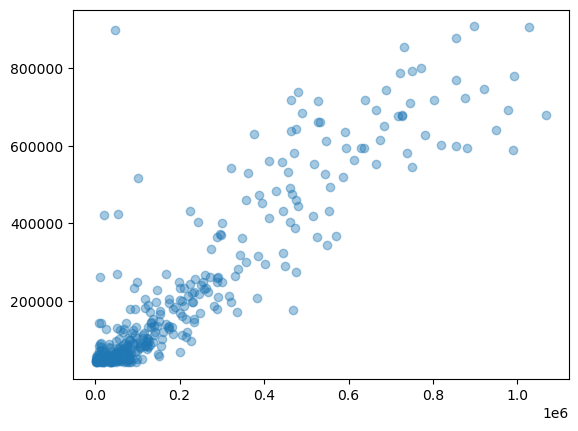

In [28]:
features_2 = df[['BreakPointsOpportunities']]
outcome_2 = df[['Winnings']]

features_2_train, features_2_test, outcome_2_train, outcome_2_test = train_test_split(features_2, outcome_2, train_size = 0.8)

model = LinearRegression()
model.fit(features_2_train,outcome_2_train)

model.score(features_2_test,outcome_2_test)

prediction_2 = model.predict(features_2_test)

plt.scatter(outcome_2_test,prediction_2, alpha=0.4)
#plt.plot(outcome_2_test, prediction_2, color="orange")

plt.show()

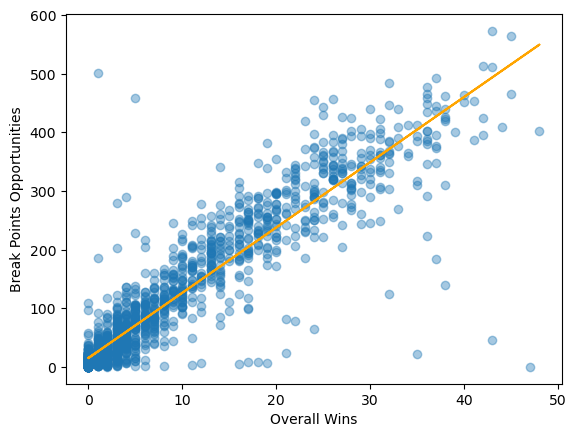

In [14]:
wins = df["Wins"]
wins = df["Wins"].array.reshape(-1, 1)
BPO = df["BreakPointsOpportunities"]

plt.scatter(wins, BPO, alpha=0.4)
plt.xlabel("Overall Wins")
plt.ylabel("Break Points Opportunities")
# plt.show()

lr = LinearRegression()
lr.fit(wins, BPO)
BPO_predict = lr.predict(wins)
plt.plot(wins, BPO_predict, color="orange")
plt.show()

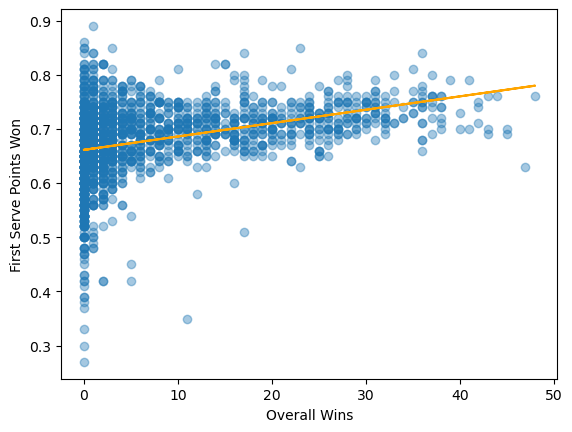

In [16]:
# perform exploratory analysis here:
wins = df["Wins"]
wins = df["Wins"].array.reshape(-1, 1)
FSPW = df["FirstServePointsWon"]

plt.scatter(wins, FSPW, alpha=0.4)
plt.xlabel("Overall Wins")
plt.ylabel("First Serve Points Won")
# plt.show()

lr = LinearRegression()
lr.fit(wins, FSPW)
first_serve_predict = lr.predict(wins)
plt.plot(wins, first_serve_predict, color="orange")
plt.show()

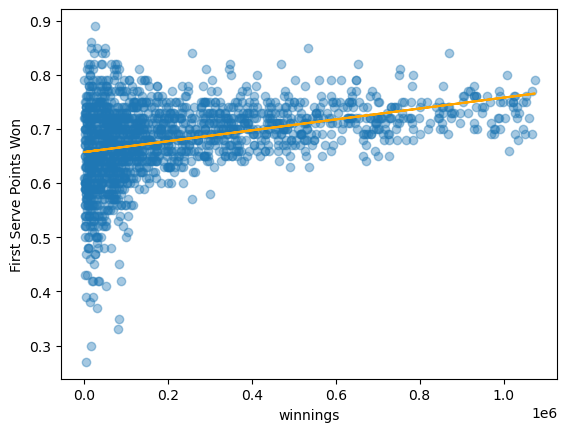

<Figure size 640x480 with 0 Axes>

In [18]:
winnings = df["Winnings"]
winnings = df["Winnings"].array.reshape(-1, 1)

plt.scatter(winnings, FSPW, alpha=0.4)
plt.xlabel("winnings")
plt.ylabel("First Serve Points Won")
# plt.show()

lr.fit(winnings, FSPW)
winnings_predict = lr.predict(winnings)
plt.plot(winnings, winnings_predict, color="orange")
plt.show()
plt.clf()

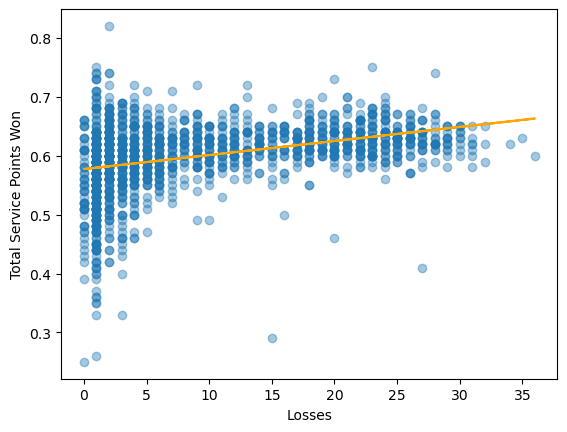

<Figure size 640x480 with 0 Axes>

In [20]:
losses = df["Losses"]
losses = df["Losses"].array.reshape(-1, 1)
TSPW = df["TotalServicePointsWon"]

plt.scatter(losses, TSPW, alpha=0.4)
plt.xlabel("Losses")
plt.ylabel("Total Service Points Won")
# plt.show()

lr.fit(losses, TSPW)
losses_predict = lr.predict(losses)
plt.plot(losses, losses_predict, color="orange")
plt.show()
plt.clf()

In [22]:
X = df[["Wins", "Ranking"]]
y = df["Winnings"]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

winnings_predicted = mlr.predict(x_test)

print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

print(f"Coefficients: {mlr.coef_}")
print(f"Intercept: {mlr.intercept_}")

Train score:
0.8426408456422414
Test score:
0.8493516205077237
Coefficients: [22102.90660618  -104.80012979]
Intercept: 89925.37541415135


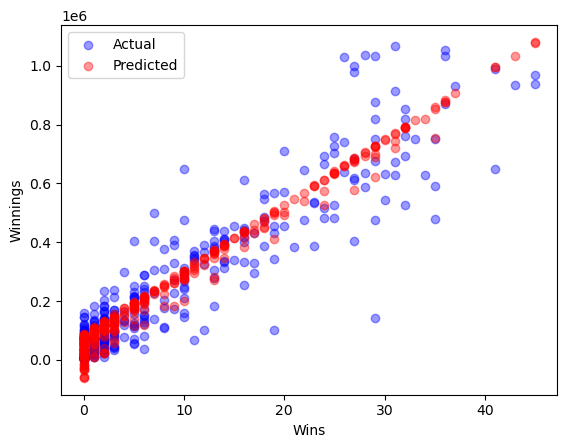

<Figure size 640x480 with 0 Axes>

In [32]:
# Plotting only the first feature ("Wins") vs. predicted values
plt.scatter(x_test["Wins"], y_test, color='blue', alpha=0.4, label='Actual')
plt.scatter(x_test["Wins"], winnings_predicted, color='red', alpha=0.4, label='Predicted')
plt.xlabel("Wins")
plt.ylabel("Winnings")
plt.legend()
plt.show()
plt.clf()

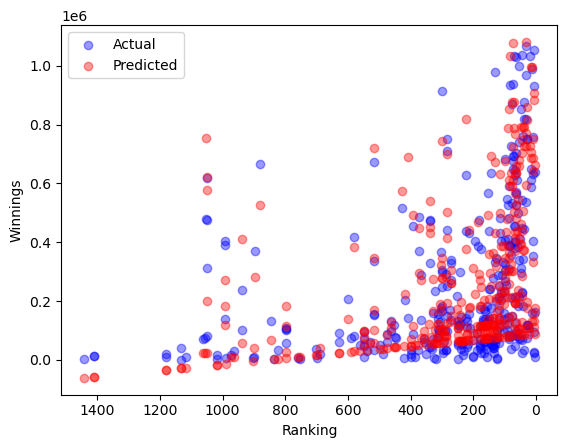

In [34]:
# Plotting only the second feature ("Ranking") vs. predicted values
plt.scatter(x_test["Ranking"], y_test, color='blue', alpha=0.4, label='Actual')
plt.scatter(x_test["Ranking"], winnings_predicted, color='red', alpha=0.4, label='Predicted')
plt.xlabel("Ranking")
plt.ylabel("Winnings")
plt.legend()
plt.gca().invert_xaxis()
plt.show()

In [36]:
## perform two feature linear regressions here:

X1 = df[["FirstServe", "FirstServePointsWon", "SecondServePointsWon", "TotalServicePointsWon"]]
y1 = df["Wins"]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train1, y_train1)
y_predicted1 = mlr.predict(x_test1)

print("Train score:")
print(mlr.score(x_train1, y_train1))

print("Test score:")
print(mlr.score(x_test1, y_test1))

print(f"Coefficients: {mlr.coef_}")
print(f"Intercept: {mlr.intercept_}")

Train score:
0.16019424160309592
Test score:
0.1590783631038919
Coefficients: [ 1.54701291 12.07041421  0.95998548 56.43181077]
Intercept: -35.5664270948216


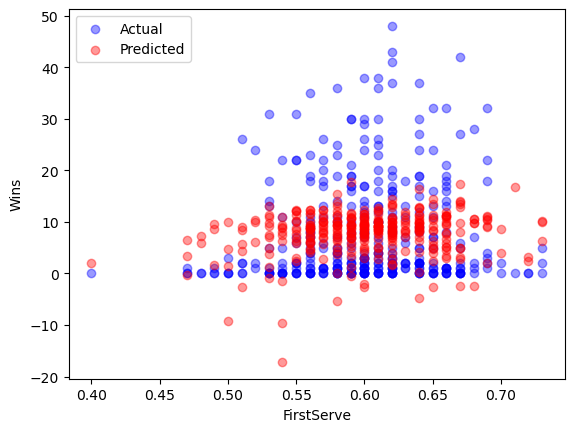

In [38]:
# Plotting only the first feature ("FirstServe") vs. predicted values
plt.scatter(x_test1["FirstServe"], y_test1, color='blue', alpha=0.4, label='Actual')
plt.scatter(x_test1["FirstServe"], y_predicted1, color='red', alpha=0.4, label='Predicted')
plt.xlabel("FirstServe")
plt.ylabel("Wins")
plt.legend()
plt.show()

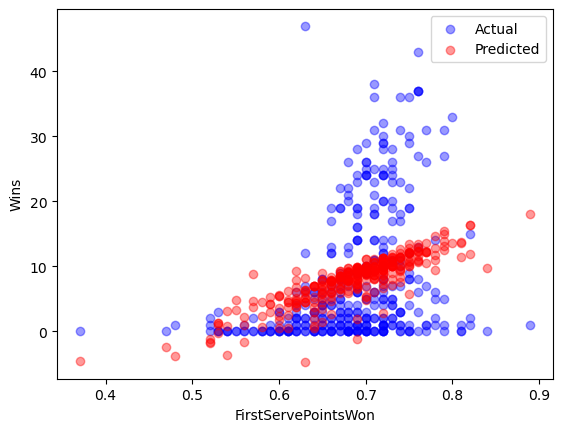

In [145]:
# Plotting only the second feature ("FirstServePointsWon") vs. predicted values
plt.scatter(x_test1["FirstServePointsWon"], y_test1, color='blue', alpha=0.4, label='Actual')
plt.scatter(x_test1["FirstServePointsWon"], y_predicted1, color='red', alpha=0.4, label='Predicted')
plt.xlabel("FirstServePointsWon")
plt.ylabel("Wins")
plt.legend()
plt.show()

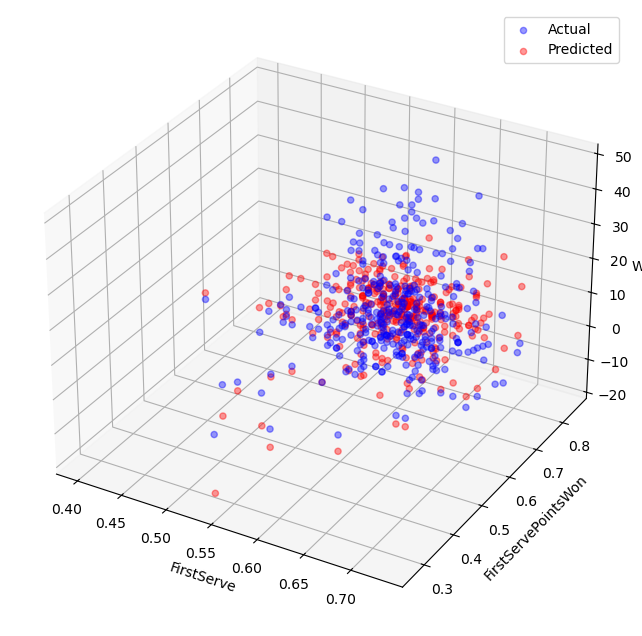

In [40]:
# Here, we can create a 3D plot for the two features and the predicted values
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test1["FirstServe"], x_test1["FirstServePointsWon"], y_test1, color='blue', label='Actual', alpha=0.4)
ax.scatter(x_test1["FirstServe"], x_test1["FirstServePointsWon"], y_predicted1, color='red', label='Predicted', alpha=0.4)

ax.set_xlabel('FirstServe')
ax.set_ylabel('FirstServePointsWon')
ax.set_zlabel('Wins')

plt.legend()
plt.show()